<a href="https://colab.research.google.com/github/joe94113/Deep-Learning-course/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

In [ ]:
from google.colab import drive
drive.mount('/gdrive') # 像隨身碟插入

Mounted at /gdrive


In [ ]:
import glob
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline
fs = glob.glob("/gdrive/My Drive/face_demo/*")
f = fs[0]
img = face_recognition.load_image_file(f) # 讀取圖片，轉成np.array
en = face_recognition.face_encodings(img)[0] # 他會找照片中的所有臉
print("化繁為簡的128特徵:", en)
plt.imshow(img) #畫出來

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
import os
encodings = []
names = []
for f in fs:
  print("處理", f)
  img = face_recognition.load_image_file(f) # 讀取圖片，轉成np.array
  en = face_recognition.face_encodings(img)[0] # 化繁為簡只取重要128特徵，用128個分數形容他
  name = os.path.split(f)[-1].split(".")[0] # os.path.split() 函數將文件路徑和文件名分開
  encodings.append(list(en)) # array轉成list
  names.append(name)
df = pd.DataFrame({
    "Name":names,
    "Encoding":encodings
})
df.to_csv("/gdrive/My Drive/face.csv",
      encoding="utf-8",
      index=False)
df

處理 /gdrive/My Drive/face_demo/yui.jfif
處理 /gdrive/My Drive/face_demo/me.jpg
處理 /gdrive/My Drive/face_demo/ja.jfif
處理 /gdrive/My Drive/face_demo/julin.jpg


,Name,Encoding
0,yui,"[-0.016186142340302467, 0.12676560878753662, 0..."
1,me,"[-0.12371769547462463, 0.056768760085105896, -..."
2,ja,"[-0.10506393015384674, 0.19111447036266327, 0...."
3,julin,"[-0.11940853297710419, 0.115167997777462, 0.10..."


In [ ]:
df = pd.read_csv("/gdrive/My Drive/face.csv", encoding="utf-8") # Encoding是文字
df

,Name,Encoding
0,yui,"[-0.016186142340302467, 0.12676560878753662, 0..."
1,me,"[-0.12371769547462463, 0.056768760085105896, -..."
2,ja,"[-0.10506393015384674, 0.19111447036266327, 0...."
3,julin,"[-0.11940853297710419, 0.115167997777462, 0.10..."


In [ ]:
import json
names = list(df["Name"])
encodings = list(df["Encoding"])
# df["Encoding"].apply(lambda x:json.loads(x))

請輸入圖片網址:https://img-s-msn-com.akamaized.net/tenant/amp/entityid/BB15QRCO.img?h=0&w=600&m=6&q=60&u=t&o=f&l=f&x=246&y=147
--------------- 找到一張臉 ---------------
這張臉應該是: yui
跟 yui 的距離 0.3589960428184808
跟 me 的距離 0.6499352687641011
跟 ja 的距離 0.6895817246432929
跟 julin 的距離 0.5357245038851429


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


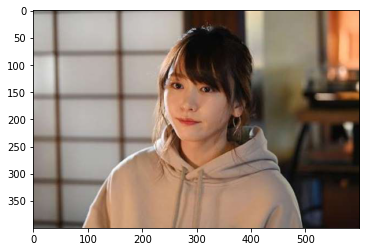

In [ ]:
import requests
url = input("請輸入圖片網址:")
response = requests.get(url, stream=True, verify=False) # stream=True抓圖片要設為true,verify=False不要嚴格驗證
img = face_recognition.load_image_file(response.raw)
ens = face_recognition.face_encodings(img)
for en in ens:
  print("-"*15, "找到一張臉", "-"*15)
  distance = face_recognition.face_distance(en, encodings) # 算距離越近越像
  if min(distance) < 0.5:
    idx = distance.argmin()
    print("這張臉應該是:",names[idx])
  else:
    print("這張臉不在資料庫庫中")
  for n,d in zip(names,distance):
    print("跟", n, "的距離", d)
plt.imshow(img)

In [ ]:
# test
a = [1,2,3]
b = [4,5,6]
list(zip(a,b))

[(1, 4), (2, 5), (3, 6)]